# Sentiment Analysis

In [51]:
!gdown 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: c:\Project\AI VIET NAM\sentiment-analysis\IMDB-Dataset.csv

  0%|          | 0.00/66.2M [00:00<?, ?B/s]
  1%|          | 524k/66.2M [00:00<01:56, 566kB/s]
  2%|▏         | 1.05M/66.2M [00:01<01:31, 716kB/s]
  2%|▏         | 1.57M/66.2M [00:02<01:25, 757kB/s]
  3%|▎         | 2.10M/66.2M [00:02<01:19, 811kB/s]
  4%|▍         | 2.62M/66.2M [00:03<01:11, 894kB/s]
  5%|▍         | 3.15M/66.2M [00:03<01:09, 911kB/s]
  6%|▌         | 3.67M/66.2M [00:04<01:05, 952kB/s]
  6%|▋         | 4.19M/66.2M [00:04<01:08, 902kB/s]
  7%|▋         | 4.72M/66.2M [00:05<01:06, 924kB/s]
  8%|▊         | 5.24M/66.2M [00:06<01:06, 919kB/s]
  9%|▊         | 5.77M/66.2M [00:06<01:05, 917kB/s]
 10%|▉         | 6.29M/66.2M [00:07<01:21, 733kB/s]
 10%|█         | 6.82M/66.2M [00:08<01:20, 742kB/s]
 11%|█         | 7.34M/66.2M [00:09<01:19, 739kB/s]
 12%|█▏        | 7.86M/66.2M [00:09<01:15, 769kB/s]
 13%|█▎        | 8.39M/66.2

In [52]:
import pandas as pd

df = pd.read_csv("./IMDB-Dataset.csv")
print(df.shape)

# Remove duplicate rows
df = df.drop_duplicates()
print(df.shape)

(50000, 2)
(49582, 2)


Xoá các thẻ html, cảm xúc, dấu câu, số,...

In [59]:
import re
import string
import nltk

nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words("english"))


# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)


# Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()
    # xoá thẻ html
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Expanding chatwords and contracts clearing
    text = expand_contractions(text)
    contractions
    emoji_clean = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    text = emoji_clean.sub(r" ", text)

    # add space after full stop
    text = re.sub(r"\.(?=\S)", ". ", text)

    # remove urls
    text = re.sub(r"http\S+", "", text)

    # remove punctuation and make text lowercase
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    # lemmatize
    text = " ".join(
        [
            wl.lemmatize(word)
            for word in text.split()
            if word not in stop and word.isalpha()
        ]
    )
    return text


df["review"] = df["review"].apply(preprocess_text)
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


Phân tích dữ liệu

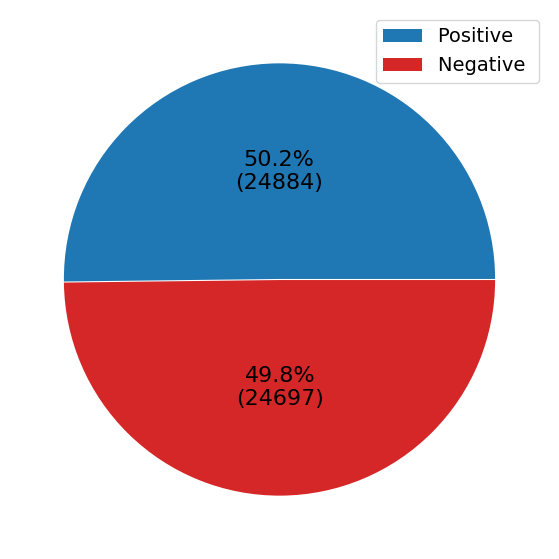

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.0 * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


freq_pos = len(df[df["sentiment"] == "positive"])
freq_neg = len(df[df["sentiment"] == "negative"])

data = [freq_pos, freq_neg]

labels = ["positive", "negative"]
# Create pie chart
pie, ax = plt.subplots(figsize=[11, 7])
plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.0025] * 2,
    pctdistance=0.5,
    colors=[sns.color_palette()[0], "tab:red"],
    textprops={"fontsize": 16},
)
# plt . title ( ' Frequencies of sentiment labels ', fontsize =14 , fontweight = ' bold ')
labels = [r"Positive ", r"Negative "]
plt.legend(labels, loc="best", prop={"size": 14})
pie.savefig(" PieChart.png")
plt.show()

Thống kê độ dài của các mẫu cho mỗi class.

In [63]:
words_len = df["review"].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


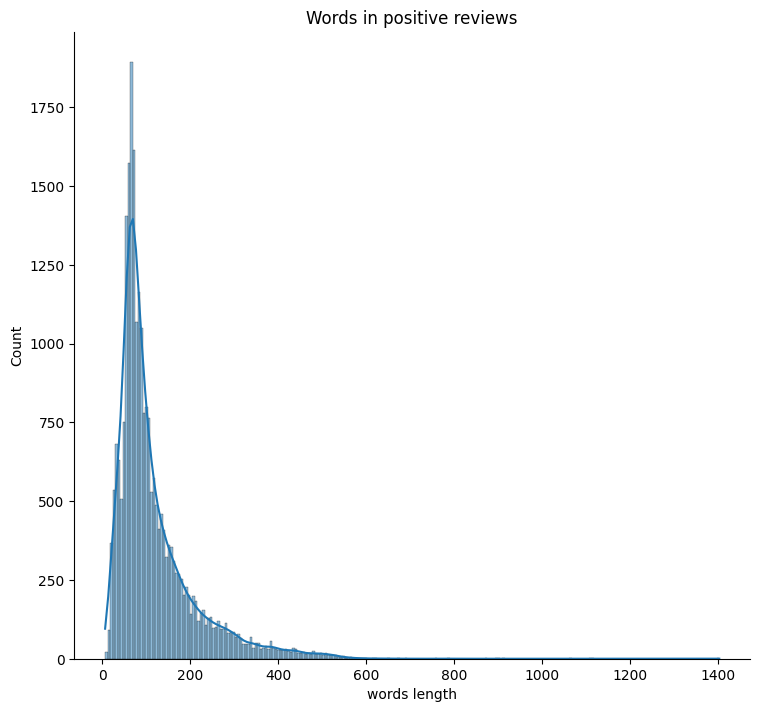

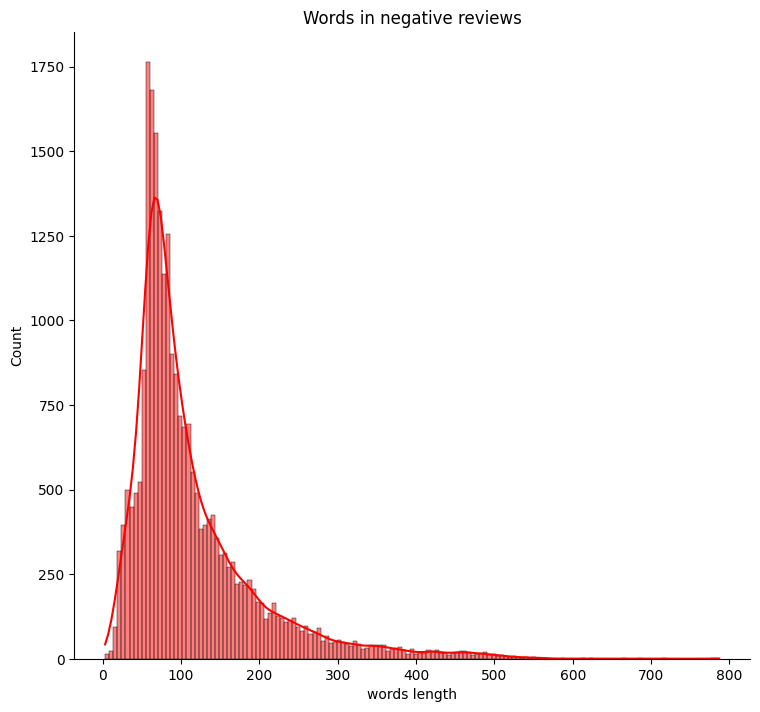

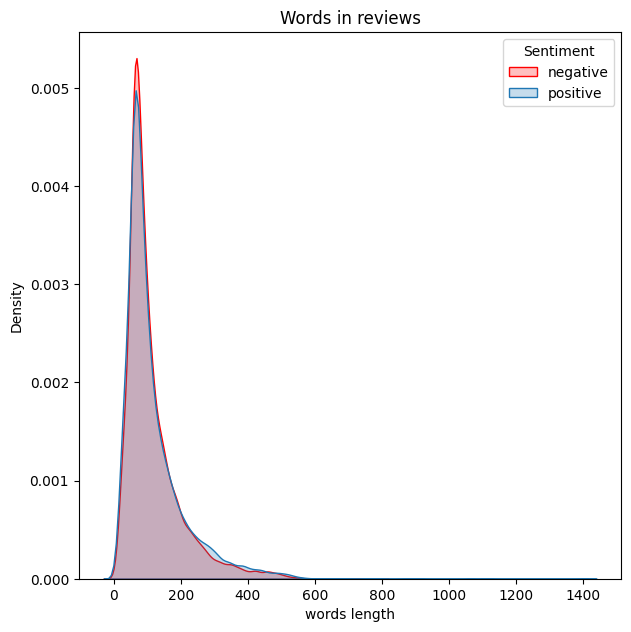

In [64]:
df_temp["words length"] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp["sentiment"] == "positive"],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False,
).set(title="Words in positive reviews")
plt.show(hist_positive)

hist_negative = sns.displot(
    data=df_temp[df_temp["sentiment"] == "negative"],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False,
    palette=["red"],
).set(title="Words in negative reviews")
plt.show(hist_negative)

plt.figure(figsize=(7, 7.1))
kernel_distibution_number_words_plot = sns.kdeplot(
    data=df_temp,
    x="words length",
    hue="sentiment",
    fill=True,
    palette=[sns.color_palette()[0], "red"],
).set(title="Words in reviews")
plt.legend(title="Sentiment", labels=["negative", "positive"])
plt.show(kernel_distibution_number_words_plot)

In [65]:
from collections import Counter

words = ' '.join(df['review']).split()
counter = Counter(words)
most = counter.most_common()
vocabs, word_counts = [], []
for word, count in most:
    if(word not in stop):
        vocabs.append(word)
        word_counts.append(count)

In [66]:
word_counts_df = pd.DataFrame({
    'word': word,
    'word_count': word_counts
})
word_counts_df

,word,word_count
0,yosemitei,98190
1,yosemitei,89128
2,yosemitei,52247
3,yosemitei,39447
4,yosemitei,30833
...,...,...
200846,yosemitei,1
200847,yosemitei,1
200848,yosemitei,1
200849,yosemitei,1


Training data

In [67]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


Chia dữ liệu

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
x_data = df["review"]
y_data = label_encode.fit_transform(df["sentiment"])

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

Biểu diễn văn bản thành vector

In [69]:
# x_train = ["" if pd.isnull(x) else str(x) for x in x_train]
# x_test = ["" if pd.isnull(x) else str(x) for x in x_test]

tfidf_vectorizer = TfidfVectorizer(max_features=10000, input="content")
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

Huấn luyện mô hình bằng DecisionTreeClassifier():

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.7075728546939599

Huấn luyện bằng RandomForestClassifier()

In [71]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)

accuracy_score(y_pred, y_test)

0.8390642331350207

Huấn luyện bằng AdaBoostClassifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier

rf_classifier = AdaBoostClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7866290208732479

Huấn luyện bằng GradientBoostingClassifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

rf_classifier = AdaBoostClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7866290208732479

Huấn luyện bằng XGBClassifier

In [74]:
from xgboost import XGBClassifier

rf_classifier = XGBClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.8440052435212262